In [1]:
data_url = "https://forge.scilab.org/index.php/p/rdataset/source/file/master/csv/boot/amis.csv"

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
original_data = pd.read_csv(data_url)

In [4]:
print(original_data.columns)

Index(['Unnamed: 0', 'speed', 'period', 'warning', 'pair'], dtype='object')


In [5]:
sign_data = original_data.copy()[["speed","period","warning","pair"]]

In [6]:
sign_data.head()

,speed,period,warning,pair
0,26,1,1,1
1,26,1,1,1
2,26,1,1,1
3,26,1,1,1
4,27,1,1,1


In [7]:
warn_dict ={1:"sign built",2:"no sign"}
period_dict = {1:"initial",2:"short term",3:"long term"}
period_order = ["initial","short term","long term"]
pair_order = ["location " + str(x) for x in range(1,14)]
sign_data.warning=[warn_dict.get(x) for x in sign_data.warning]
sign_data.period=[period_dict.get(x) for x in sign_data.period]
sign_data.pair = ["location "+str(x) for x in sign_data.pair]

In [8]:
sign_data.head()

,speed,period,warning,pair
0,26,initial,sign built,location 1
1,26,initial,sign built,location 1
2,26,initial,sign built,location 1
3,26,initial,sign built,location 1
4,27,initial,sign built,location 1


In [9]:
observation_periods = sign_data.groupby(by=["pair","warning","period"]).agg(["mean","std","min","max", ("shapiro_test_p",lambda x: stats.shapiro(x)[1]),("normal_test_p",lambda x: stats.normaltest(x)[1]),("skew",lambda x: stats.skew(x)),("kurtosis",lambda x: stats.kurtosis(x))])
observation_periods.head()

speed                                   \
                                   mean       std min max shapiro_test_p   
pair       warning    period                                               
location 1 no sign    initial     34.17  5.301143  21  51       0.290460   
                      long term   36.26  5.582476  24  54       0.024468   
                      short term  38.65  5.485288  28  56       0.049749   
           sign built initial     34.53  5.014031  26  49       0.007822   
                      long term   34.77  5.078883  21  51       0.176891   

                                                                    
                                 normal_test_p      skew  kurtosis  
pair       warning    period                                        
location 1 no sign    initial         0.290771  0.296136  0.312131  
                      long term       0.014218  0.630553  0.609169  
                      short term      0.195766  0.415625  0.061483  
           sign built initial         0.052100  0.589900 -0.002169  
                      long term       0.218740  0.206453  0.677217

In [10]:
observation_periods.tail()

speed                                   \
                                   mean       std min max shapiro_test_p   
pair       warning    period                                               
location 9 no sign    long term   38.20  4.474394  28  55       0.001572   
                      short term  37.47  3.937530  30  49       0.035492   
           sign built initial     38.05  5.097781  30  51       0.001570   
                      long term   38.62  5.890894  28  58       0.000216   
                      short term  34.31  4.253804  24  50       0.159506   

                                                                    
                                 normal_test_p      skew  kurtosis  
pair       warning    period                                        
location 9 no sign    long term       0.000325  0.739138  1.859186  
                      short term      0.133658  0.420456  0.321820  
           sign built initial         0.040767  0.622785 -0.162414  
                      long term       0.001032  0.896656  0.593814  
                      short term      0.039629  0.422582  0.923313

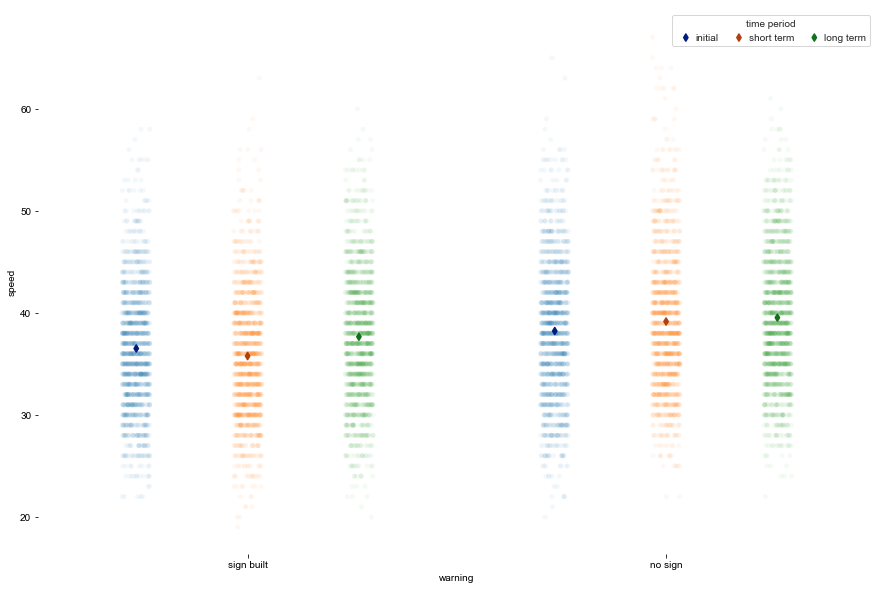

In [11]:
plot_size = (15,10)
f, ax = plt.subplots(figsize = plot_size)
sns.set_style("whitegrid")
sns.despine(bottom=True, left=True)
sns.stripplot(x="warning", y="speed", hue="period",
              data=sign_data, dodge=True, jitter=True,
              alpha=.05, zorder=1)
sns.pointplot(x="warning", y="speed", hue="period",
              data=sign_data, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="time period",
          handletextpad=0, columnspacing=1,
          loc="upper right", ncol=3, frameon=True)
plt.show()

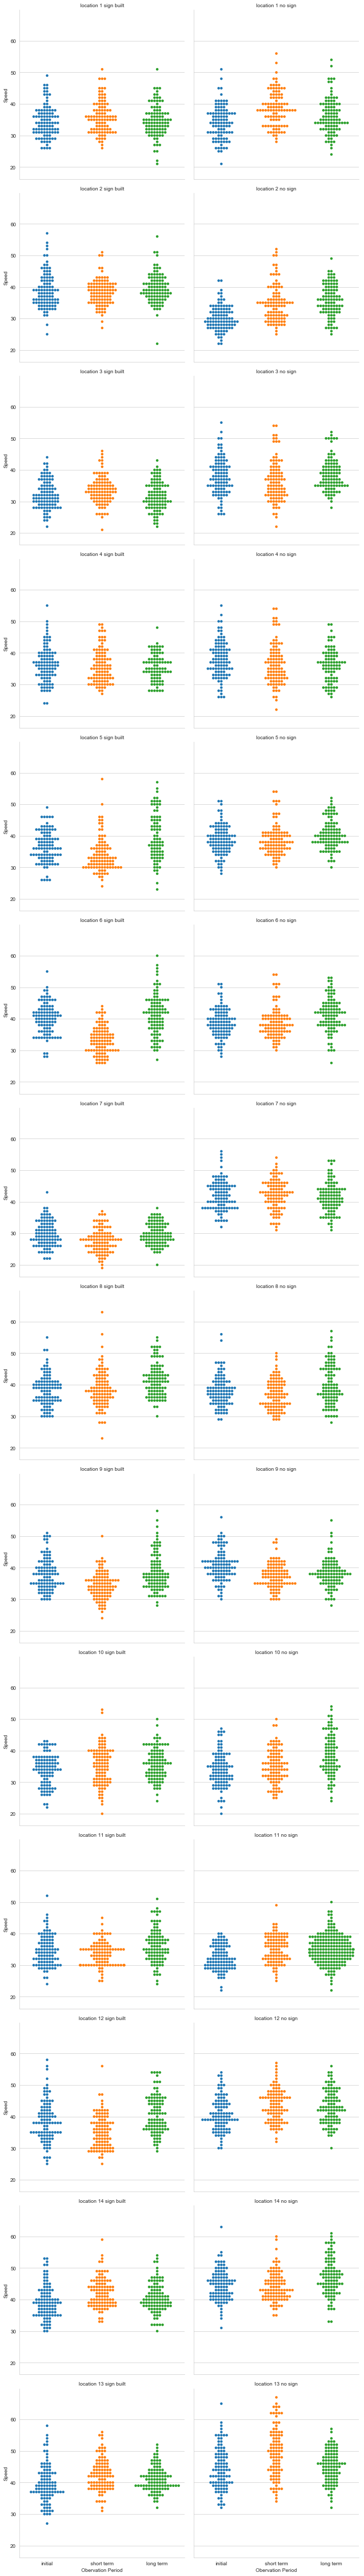

In [12]:
location_plot = sns.catplot(x="period",y="speed", data = sign_data,col = "warning",row = "pair",kind="swarm")
location_plot.set_axis_labels("Obervation Period", "Speed").set_titles("{row_name} {col_name}")
plt.show()

In [13]:
observation_periods.columns

MultiIndex(levels=[['speed'], ['mean', 'std', 'min', 'max', 'shapiro_test_p', 'normal_test_p', 'skew', 'kurtosis']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7]])

In [14]:
observation_periods.index

MultiIndex(levels=[['location 1', 'location 10', 'location 11', 'location 12', 'location 13', 'location 14', 'location 2', 'location 3', 'location 4', 'location 5', 'location 6', 'location 7', 'location 8', 'location 9'], ['no sign', 'sign built'], ['initial', 'long term', 'short term']],
           codes=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13], [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 

In [15]:
period_means = observation_periods.loc[:,("speed","mean")].unstack("period").assign(change_short = lambda x: x["short term"] -x["initial"],change_long = lambda x: x["long term"] - x["initial"])
period_means.head()

period                  initial  long term  short term  change_short  \
pair        warning                                                    
location 1  no sign       34.17  36.260000       38.65          4.48   
            sign built    34.53  34.770000       35.97          1.44   
location 10 no sign       34.02  38.688889       35.07          1.05   
            sign built    33.95  35.850000       35.09          1.14   
location 11 no sign       32.19  35.100000       35.12          2.93   

period                  change_long  
pair        warning                  
location 1  no sign        2.090000  
            sign built     0.240000  
location 10 no sign        4.668889  
            sign built     1.900000  
location 11 no sign        2.910000

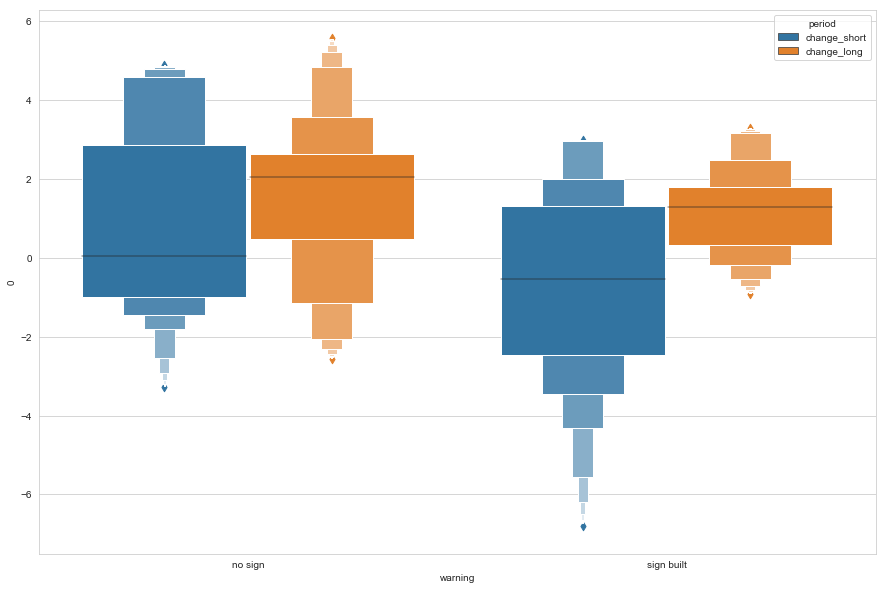

In [16]:
plt.figure(figsize=plot_size)
plot_data = period_means[["change_short","change_long"]].stack().reset_index().copy()
sns.boxenplot(data = plot_data, x = "warning",y = 0,hue = "period")
plt.show()

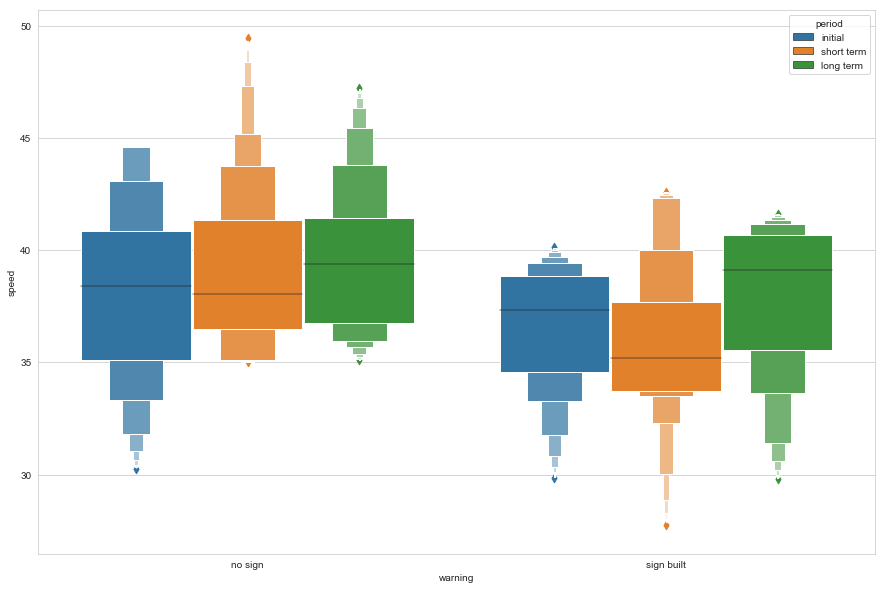

In [17]:
plt.figure(figsize=plot_size)
plot_data = sign_data.groupby(by=["pair","warning","period"]).mean().reset_index()
sns.boxenplot(x = "warning",y="speed",hue="period",data = plot_data, hue_order = period_order)
plt.show()

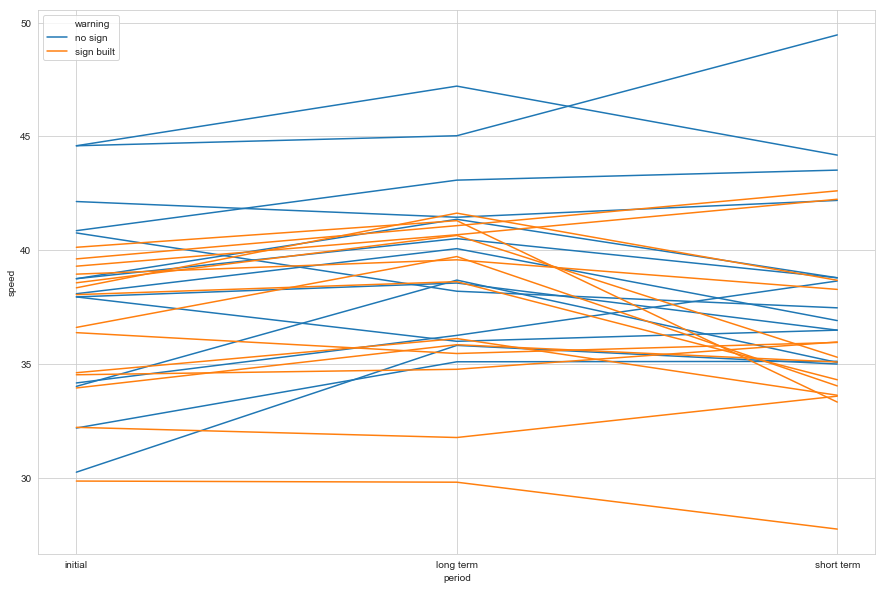

In [18]:
plt.figure(figsize=plot_size)
plot_data = sign_data.groupby(by=["pair","warning","period"]).mean().reset_index()
sns.lineplot(x="period",y="speed",data=plot_data,hue="warning",units="pair",estimator=None)
plt.show()

<Figure size 1080x720 with 0 Axes>

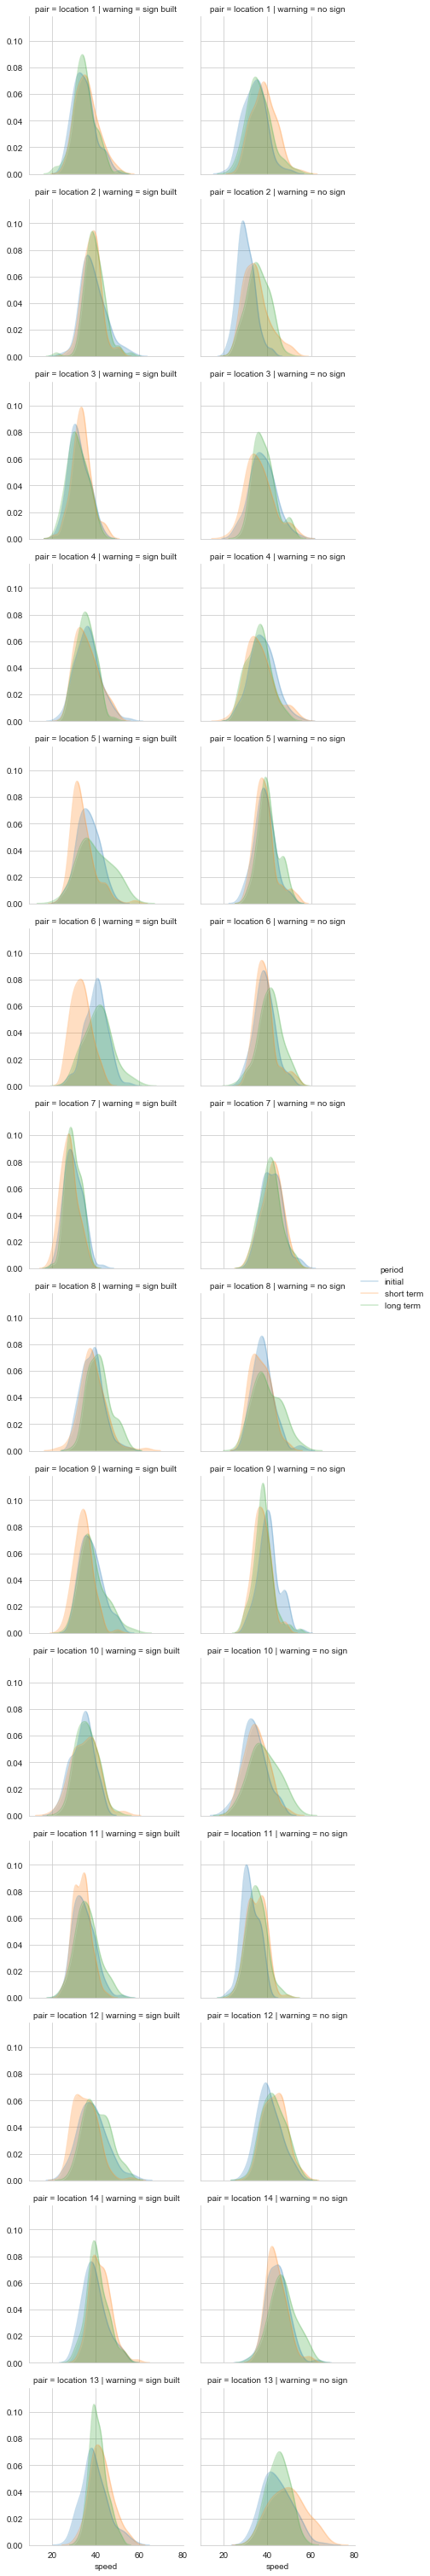

In [19]:
plt.figure(figsize = plot_size)
g = sns.FacetGrid(data= sign_data,row = "pair",col="warning",hue = "period")
g.map(sns.kdeplot,"speed", shade=True, alpha=.25).add_legend()
plt.show()